# Chapter 0: Randomness（乱数と確率）

このノートブックは [Nature of Code](https://natureofcode.com/random/) の第0章をJuliaで実装したものです。

## 概要

この章では、自然界のシミュレーションの基礎となる乱数と確率について学びます。

### 主要な概念

1. **ランダムウォーク** - 連続したランダムなステップで作られる経路
2. **確率分布** - 一様分布と非一様分布
3. **正規分布（ガウス分布）** - 平均値を中心としたベル曲線
4. **パーリンノイズ** - 滑らかに変化する擬似乱数

In [1]:
using Plots
using Random
using Statistics

## 0.1 ランダムウォーク

ランダムウォーカーは、毎ステップでランダムな方向に移動します。
これは自然界の多くの現象（花粉の動き、株価の変動など）をモデル化するのに使われます。

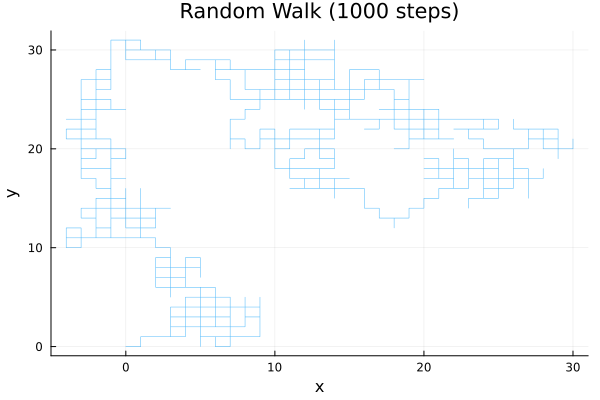

In [2]:
# 基本的なランダムウォーカー
mutable struct Walker
    x::Float64
    y::Float64
end

Walker() = Walker(0.0, 0.0)

function step!(w::Walker)
    choice = rand(1:4)
    if choice == 1
        w.x += 1
    elseif choice == 2
        w.x -= 1
    elseif choice == 3
        w.y += 1
    else
        w.y -= 1
    end
end

# シミュレーション
function simulate_random_walk(steps::Int)
    walker = Walker()
    xs = [walker.x]
    ys = [walker.y]
    
    for _ in 1:steps
        step!(walker)
        push!(xs, walker.x)
        push!(ys, walker.y)
    end
    
    return xs, ys
end

xs, ys = simulate_random_walk(1000)
plot(xs, ys, legend=false, linewidth=0.5, alpha=0.7,
     title="Random Walk (1000 steps)", xlabel="x", ylabel="y")

## 0.2 一様分布

`rand()` 関数は0から1の間で一様に分布した乱数を生成します。
つまり、どの値も同じ確率で出現します。

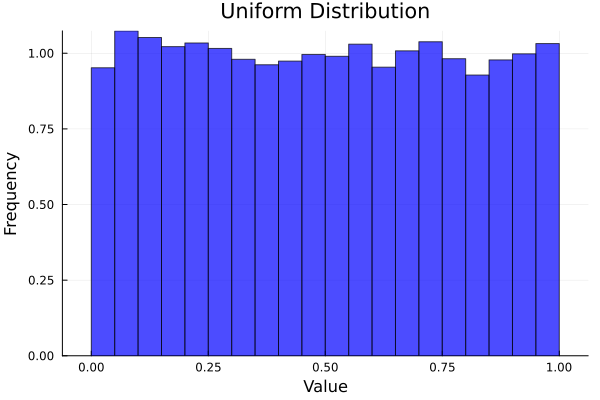

In [3]:
# 一様分布の可視化
uniform_samples = rand(10000)

histogram(uniform_samples, bins=20, normalize=true,
          title="Uniform Distribution", xlabel="Value", ylabel="Frequency",
          legend=false, color=:blue, alpha=0.7)

## 0.3 正規分布（ガウス分布）

正規分布は、平均値を中心としたベル曲線の形をしています。
自然界の多くの現象（身長、IQ、測定誤差など）がこの分布に従います。

- **平均（μ）**: 分布の中心
- **標準偏差（σ）**: 分布の広がり

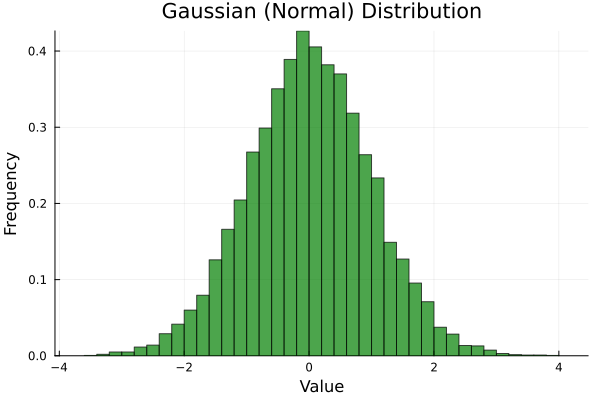

In [4]:
# 正規分布の可視化
gaussian_samples = randn(10000)  # 平均0、標準偏差1

histogram(gaussian_samples, bins=50, normalize=true,
          title="Gaussian (Normal) Distribution", xlabel="Value", ylabel="Frequency",
          legend=false, color=:green, alpha=0.7)

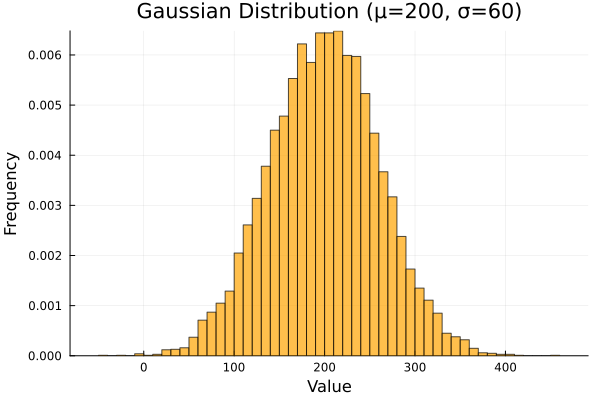

In [5]:
# 異なる平均と標準偏差を持つ正規分布
μ = 200  # 平均
σ = 60   # 標準偏差

custom_gaussian = μ .+ σ .* randn(10000)

histogram(custom_gaussian, bins=50, normalize=true,
          title="Gaussian Distribution (μ=$μ, σ=$σ)",
          xlabel="Value", ylabel="Frequency",
          legend=false, color=:orange, alpha=0.7)

## 0.4 ガウシアン・ランダムウォーク

移動距離を正規分布から取ることで、より自然な動きを実現できます。

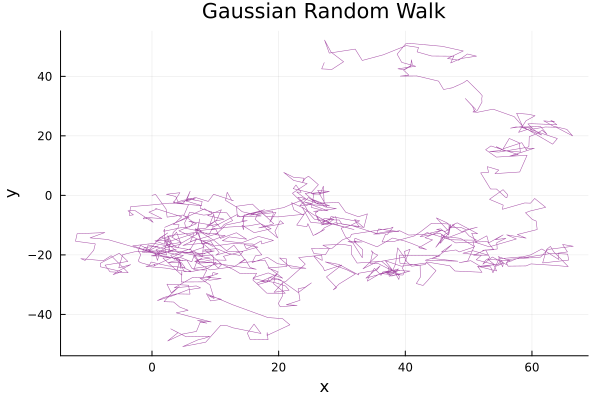

In [6]:
# ガウシアン・ランダムウォーク
function simulate_gaussian_walk(steps::Int; σ=2.0)
    x, y = 0.0, 0.0
    xs = [x]
    ys = [y]
    
    for _ in 1:steps
        x += σ * randn()
        y += σ * randn()
        push!(xs, x)
        push!(ys, y)
    end
    
    return xs, ys
end

gxs, gys = simulate_gaussian_walk(1000)
plot(gxs, gys, legend=false, linewidth=0.5, alpha=0.7,
     title="Gaussian Random Walk", xlabel="x", ylabel="y", color=:purple)

## 0.5 カスタム確率分布

特定の方向に偏ったランダムウォークを作ることもできます。
例えば、右に移動する確率を高くする場合：

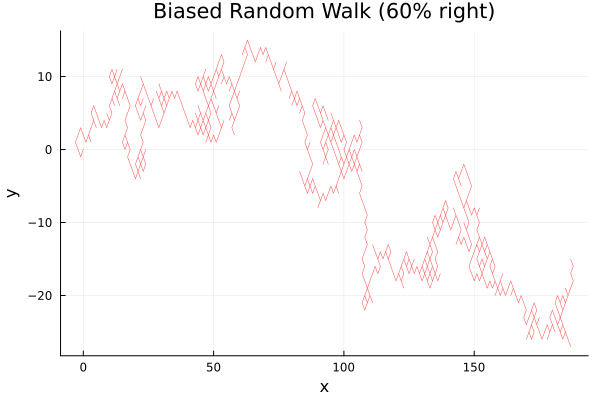

In [7]:
# 右に偏ったランダムウォーク
function simulate_biased_walk(steps::Int; right_prob=0.6)
    x, y = 0.0, 0.0
    xs = [x]
    ys = [y]
    
    for _ in 1:steps
        # 水平方向：右に偏る
        if rand() < right_prob
            x += 1
        else
            x -= 1
        end
        
        # 垂直方向：均等
        if rand() < 0.5
            y += 1
        else
            y -= 1
        end
        
        push!(xs, x)
        push!(ys, y)
    end
    
    return xs, ys
end

bxs, bys = simulate_biased_walk(1000, right_prob=0.6)
plot(bxs, bys, legend=false, linewidth=0.5, alpha=0.7,
     title="Biased Random Walk (60% right)", xlabel="x", ylabel="y", color=:red)

## 0.6 レヴィフライト

レヴィフライトは、たまに非常に大きなステップを取るランダムウォークです。
動物の採餌行動などに見られます。

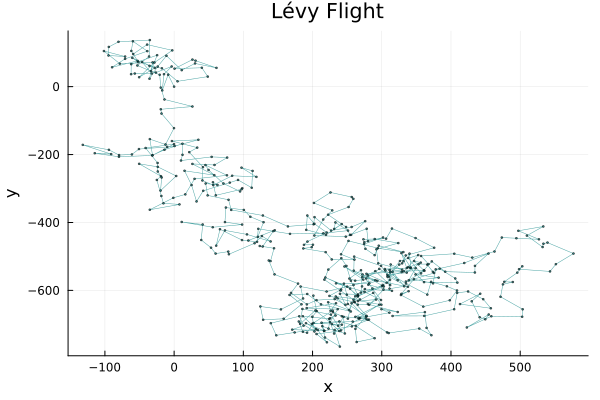

In [8]:
# レヴィフライト
function simulate_levy_flight(steps::Int)
    x, y = 0.0, 0.0
    xs = [x]
    ys = [y]
    
    for _ in 1:steps
        # モンテカルロ法で大きなステップを時々取る
        r = rand()
        while rand() > r  # rが小さいほど受理されにくい（大きなステップ）
            r = rand()
        end
        
        step_size = r * 50  # ステップサイズ
        angle = rand() * 2π
        
        x += step_size * cos(angle)
        y += step_size * sin(angle)
        
        push!(xs, x)
        push!(ys, y)
    end
    
    return xs, ys
end

lxs, lys = simulate_levy_flight(500)
plot(lxs, lys, legend=false, linewidth=0.5, alpha=0.7,
     title="Lévy Flight", xlabel="x", ylabel="y", color=:teal,
     marker=:circle, markersize=1)

## 0.7 パーリンノイズ

パーリンノイズは、連続した値同士が近い値を持つ滑らかな乱数を生成します。
地形生成、雲のテクスチャ、自然な動きのシミュレーションに使われます。

ここでは簡易的な1次元パーリンノイズを実装します。

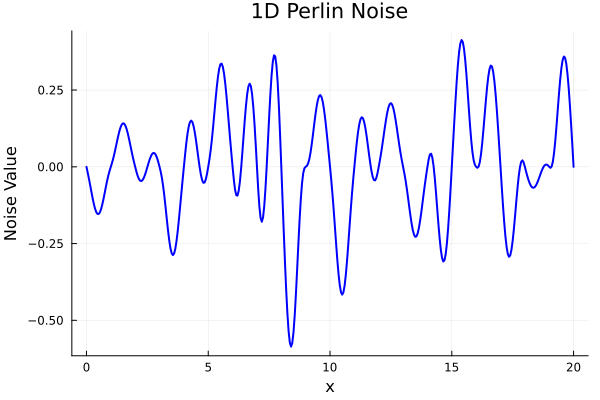

In [9]:
# 簡易的なパーリンノイズの実装
function fade(t)
    return t * t * t * (t * (t * 6 - 15) + 10)
end

function lerp(a, b, t)
    return a + t * (b - a)
end

# 1Dパーリンノイズ
function perlin_1d(x, gradients)
    x0 = floor(Int, x)
    x1 = x0 + 1
    
    # グラデーション値を取得（循環）
    n = length(gradients)
    g0 = gradients[mod(x0, n) + 1]
    g1 = gradients[mod(x1, n) + 1]
    
    # 距離
    d0 = x - x0
    d1 = x - x1
    
    # ドット積
    n0 = g0 * d0
    n1 = g1 * d1
    
    # 補間
    t = fade(d0)
    return lerp(n0, n1, t)
end

# グラデーションを生成
Random.seed!(42)
gradients = randn(256)

# パーリンノイズを生成
xs = 0:0.05:20
noise_values = [perlin_1d(x, gradients) for x in xs]

plot(xs, noise_values, legend=false, linewidth=2,
     title="1D Perlin Noise", xlabel="x", ylabel="Noise Value", color=:blue)

## 0.8 パーリンノイズを使った滑らかな動き

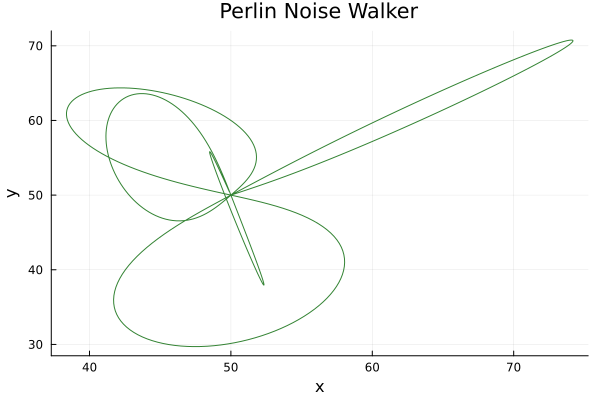

In [10]:
# パーリンノイズを使ったウォーカー
function simulate_perlin_walk(steps::Int)
    Random.seed!(123)
    gradients_x = randn(256)
    gradients_y = randn(256)
    
    tx = 0.0
    ty = 1000.0  # 異なるオフセット
    
    xs = Float64[]
    ys = Float64[]
    
    for _ in 1:steps
        # ノイズ値を0-100の範囲にマップ
        x = (perlin_1d(tx, gradients_x) + 1) * 50
        y = (perlin_1d(ty, gradients_y) + 1) * 50
        
        push!(xs, x)
        push!(ys, y)
        
        tx += 0.01
        ty += 0.01
    end
    
    return xs, ys
end

pxs, pys = simulate_perlin_walk(500)
plot(pxs, pys, legend=false, linewidth=1, alpha=0.8,
     title="Perlin Noise Walker", xlabel="x", ylabel="y", color=:darkgreen)

## 0.9 2Dパーリンノイズ（テクスチャ生成）

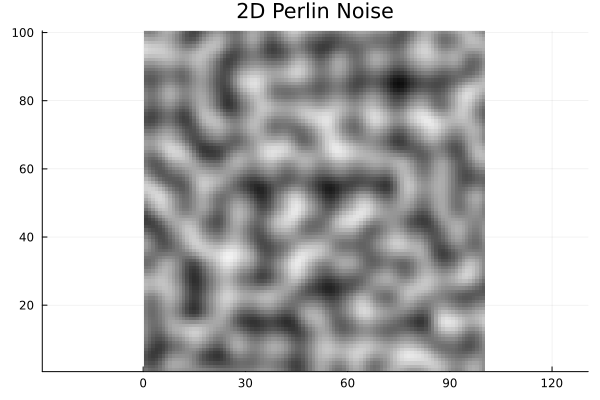

In [11]:
# 2Dパーリンノイズ（簡易版）
function perlin_2d(x, y, gradients_2d, size)
    x0 = floor(Int, x)
    y0 = floor(Int, y)
    x1 = x0 + 1
    y1 = y0 + 1
    
    # グラデーション取得
    g00 = gradients_2d[mod(x0, size) + 1, mod(y0, size) + 1, :]
    g10 = gradients_2d[mod(x1, size) + 1, mod(y0, size) + 1, :]
    g01 = gradients_2d[mod(x0, size) + 1, mod(y1, size) + 1, :]
    g11 = gradients_2d[mod(x1, size) + 1, mod(y1, size) + 1, :]
    
    # 距離ベクトル
    dx0, dy0 = x - x0, y - y0
    dx1, dy1 = x - x1, y - y1
    
    # ドット積
    n00 = g00[1] * dx0 + g00[2] * dy0
    n10 = g10[1] * dx1 + g10[2] * dy0
    n01 = g01[1] * dx0 + g01[2] * dy1
    n11 = g11[1] * dx1 + g11[2] * dy1
    
    # 補間
    u = fade(dx0)
    v = fade(dy0)
    
    nx0 = lerp(n00, n10, u)
    nx1 = lerp(n01, n11, u)
    
    return lerp(nx0, nx1, v)
end

# 2Dグラデーションを生成
Random.seed!(42)
size = 16
gradients_2d = zeros(size, size, 2)
for i in 1:size
    for j in 1:size
        angle = rand() * 2π
        gradients_2d[i, j, 1] = cos(angle)
        gradients_2d[i, j, 2] = sin(angle)
    end
end

# ノイズマップを生成
width, height = 100, 100
scale = 0.1
noise_map = zeros(height, width)

for i in 1:height
    for j in 1:width
        noise_map[i, j] = perlin_2d(j * scale, i * scale, gradients_2d, size)
    end
end

heatmap(noise_map, c=:grays, colorbar=false,
        title="2D Perlin Noise", aspect_ratio=:equal)

## 0.10 比較：ランダム vs パーリンノイズ

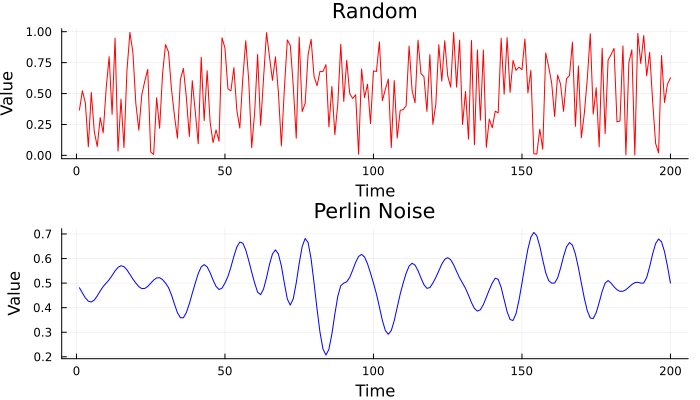

In [12]:
# ランダム vs パーリンノイズの比較
n_points = 200

# 完全ランダム
random_values = rand(n_points)

# パーリンノイズ
Random.seed!(42)
grads = randn(256)
perlin_values = [(perlin_1d(x * 0.1, grads) + 1) / 2 for x in 1:n_points]

p1 = plot(1:n_points, random_values, legend=false, linewidth=1,
          title="Random", xlabel="Time", ylabel="Value", color=:red)

p2 = plot(1:n_points, perlin_values, legend=false, linewidth=1,
          title="Perlin Noise", xlabel="Time", ylabel="Value", color=:blue)

plot(p1, p2, layout=(2, 1), size=(700, 400))

## まとめ

### 乱数の種類

| 種類 | 関数 | 用途 |
|------|------|------|
| 一様分布 | `rand()` | どの値も同じ確率 |
| 正規分布 | `randn()` | ベル曲線状の分布 |
| パーリンノイズ | カスタム実装 | 滑らかに変化する値 |

### ランダムウォークのバリエーション

1. **基本ランダムウォーク**: 4方向に均等な確率で移動
2. **ガウシアンウォーク**: 移動距離が正規分布に従う
3. **偏りウォーク**: 特定方向への確率が高い
4. **レヴィフライト**: たまに大きなステップを取る
5. **パーリンウォーク**: 滑らかで自然な動き

これらの手法を組み合わせることで、自然界のような有機的な動きをシミュレートできます。